#### Phân tích dữ liệu khách hàng Netflix

##### - Dataset : netflix_customer_churn
##### - Mục tiêu : Dự đoán hành vi người dùng có muốn rời bỏ Netflix hay không với mô hình Decision Tree và Logistic Linear 

##### Import thư viện

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

##### Load dữ liệu

In [48]:
df = pd.read_csv('netflix_customer_churn.csv')
df.head()

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action


##### Phân tích dữ liệu

In [49]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             5000 non-null   object 
 1   age                     5000 non-null   int64  
 2   gender                  5000 non-null   object 
 3   subscription_type       5000 non-null   object 
 4   watch_hours             5000 non-null   float64
 5   last_login_days         5000 non-null   int64  
 6   region                  5000 non-null   object 
 7   device                  5000 non-null   object 
 8   monthly_fee             5000 non-null   float64
 9   churned                 5000 non-null   int64  
 10  payment_method          5000 non-null   object 
 11  number_of_profiles      5000 non-null   int64  
 12  avg_watch_time_per_day  5000 non-null   float64
 13  favorite_genre          5000 non-null   object 
dtypes: float64(3), int64(4), object(7)
memor

,age,watch_hours,last_login_days,monthly_fee,churned,number_of_profiles,avg_watch_time_per_day
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,43.847400,11.649450,30.089800,13.683400,0.503000,3.024400,0.874800
std,15.501128,12.014654,17.536078,3.692062,0.500041,1.415841,2.619824
min,18.000000,0.010000,0.000000,8.990000,0.000000,1.000000,0.000000
25%,30.000000,3.337500,15.000000,8.990000,0.000000,2.000000,0.110000
50%,44.000000,8.000000,30.000000,13.990000,1.000000,3.000000,0.290000
75%,58.000000,16.030000,45.000000,17.990000,1.000000,4.000000,0.720000
max,70.000000,110.400000,60.000000,17.990000,1.000000,5.000000,98.420000


In [50]:
# Kiểm tra dữ liệu có trùng lặp không 
df.duplicated().sum()

0

In [51]:
# Kiểm tra missing values
print("Missing values after cleaning:")
print(df.isnull().sum())    

Missing values after cleaning:
customer_id               0
age                       0
gender                    0
subscription_type         0
watch_hours               0
last_login_days           0
region                    0
device                    0
monthly_fee               0
churned                   0
payment_method            0
number_of_profiles        0
avg_watch_time_per_day    0
favorite_genre            0
dtype: int64


In [52]:
# Loại bỏ cột không cần thiết (ví dụ: customer_id)
df = df.drop(['customer_id'], axis=1)

In [53]:
df.head()

,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action


#### Khám phá dữ liệu
 ##### 1. Phân tích đơn biến
 

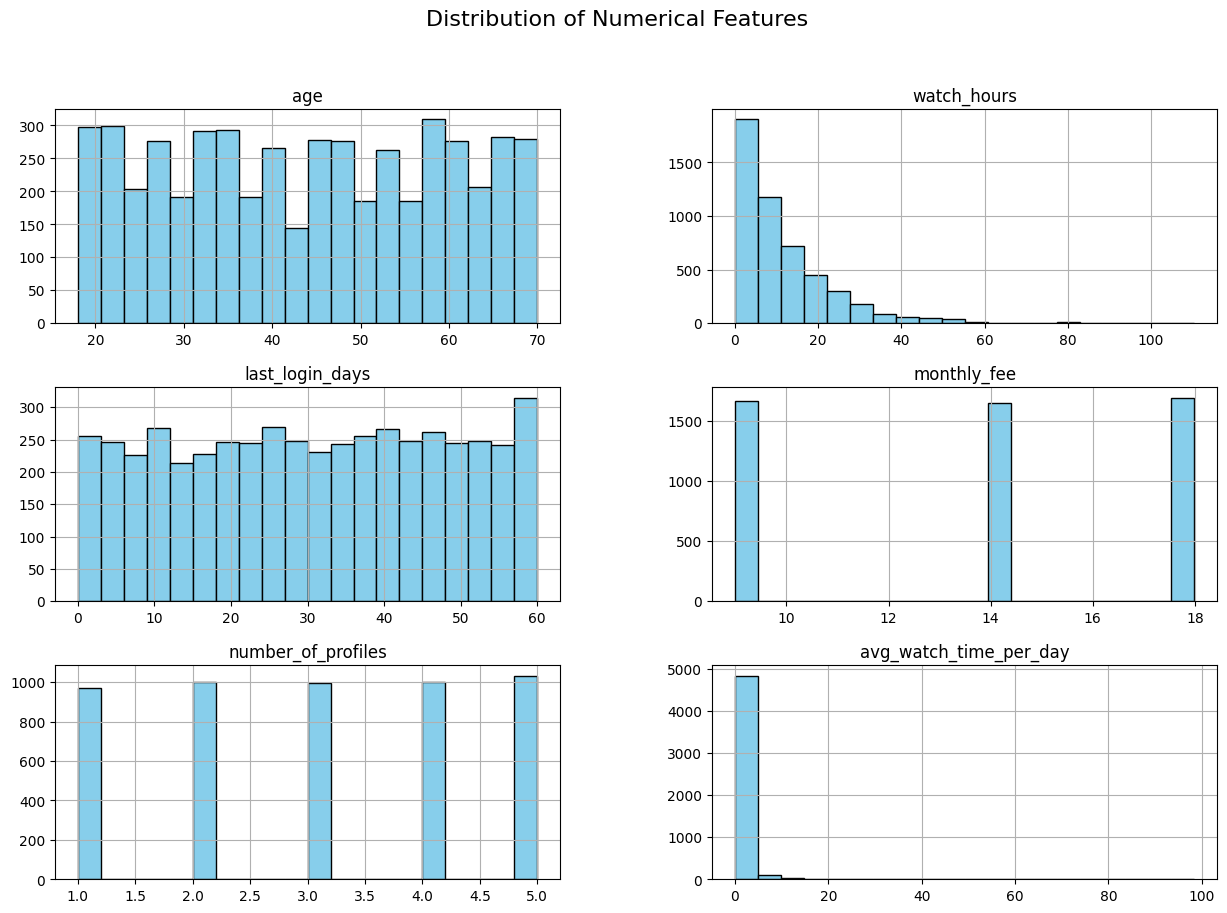

C:\Users\Tequila\AppData\Local\Temp\ipykernel_8756\3271429985.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')
C:\Users\Tequila\AppData\Local\Temp\ipykernel_8756\3271429985.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')
C:\Users\Tequila\AppData\Local\Temp\ipykernel_8756\3271429985.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')
C:\Users\Tequila\AppData\Local\Temp\ipykernel_8756\3271429985.py:17: FutureWarning: 

Passing `palet

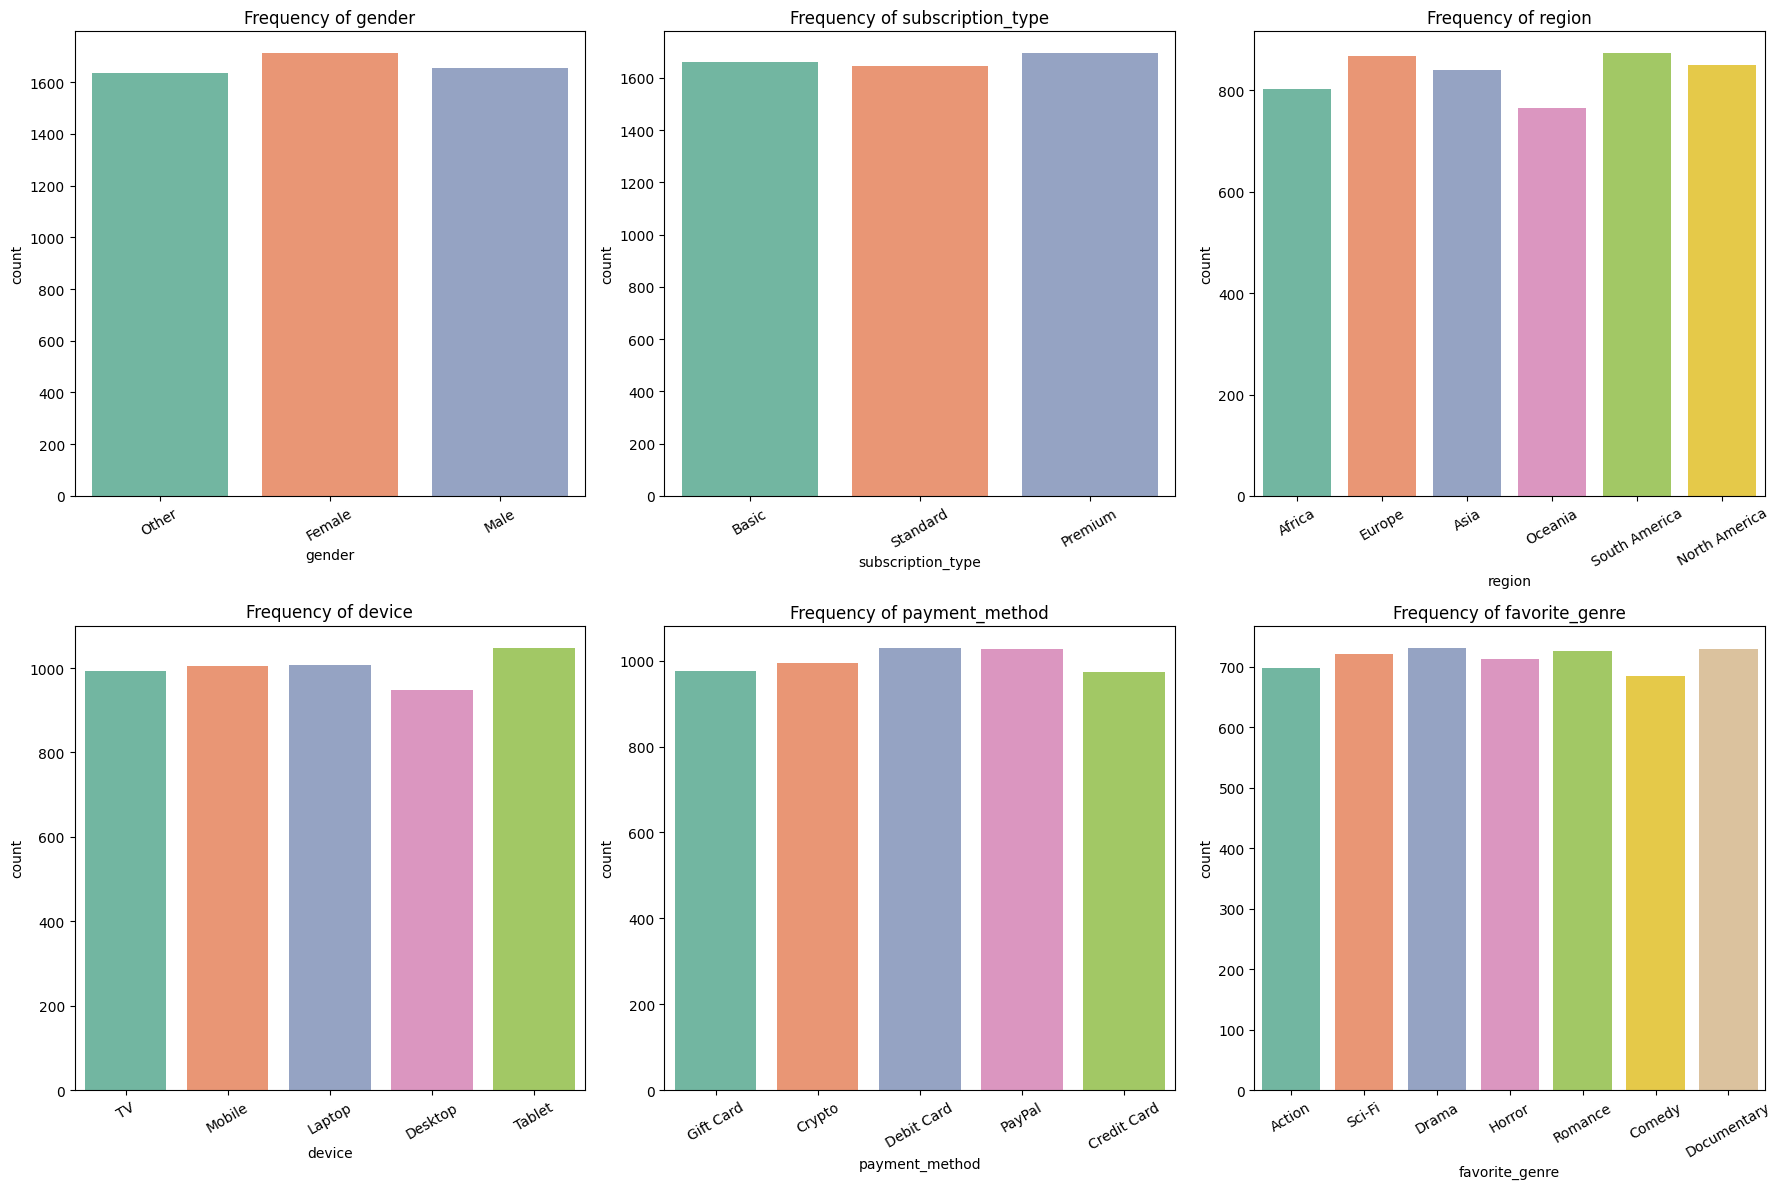

C:\Users\Tequila\AppData\Local\Temp\ipykernel_8756\3271429985.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='churned', palette='Set1')


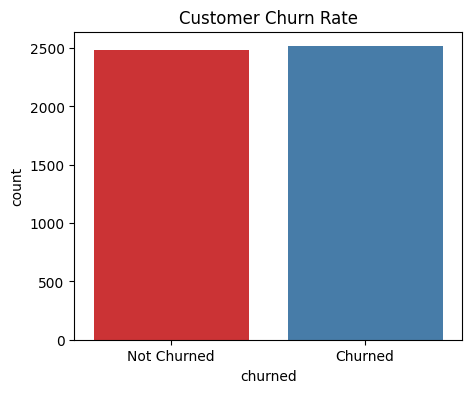

In [54]:
# Exploratory Data Analysis (EDA)

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Distribution of numerical features
num_cols = ['age', 'watch_hours', 'last_login_days', 'monthly_fee', 'number_of_profiles', 'avg_watch_time_per_day']
df[num_cols].hist(figsize=(15, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.show()

# 2. Frequency of categorical features
cat_cols = ['gender', 'subscription_type', 'region', 'device', 'payment_method', 'favorite_genre']
plt.figure(figsize=(18, 12))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f'Frequency of {col}')
    plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# 3. Churn rate
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='churned', palette='Set1')
plt.title('Customer Churn Rate')
plt.xticks([0,1], ['Not Churned', 'Churned'])
plt.show()



##### Theo đánh giá ta nhận thấy: Tỉ lệ hành vi người dùng rời bỏ và người dùng tiếp tục sử dụng là 50 - 50 

##### 2. Phân tích hai biến 


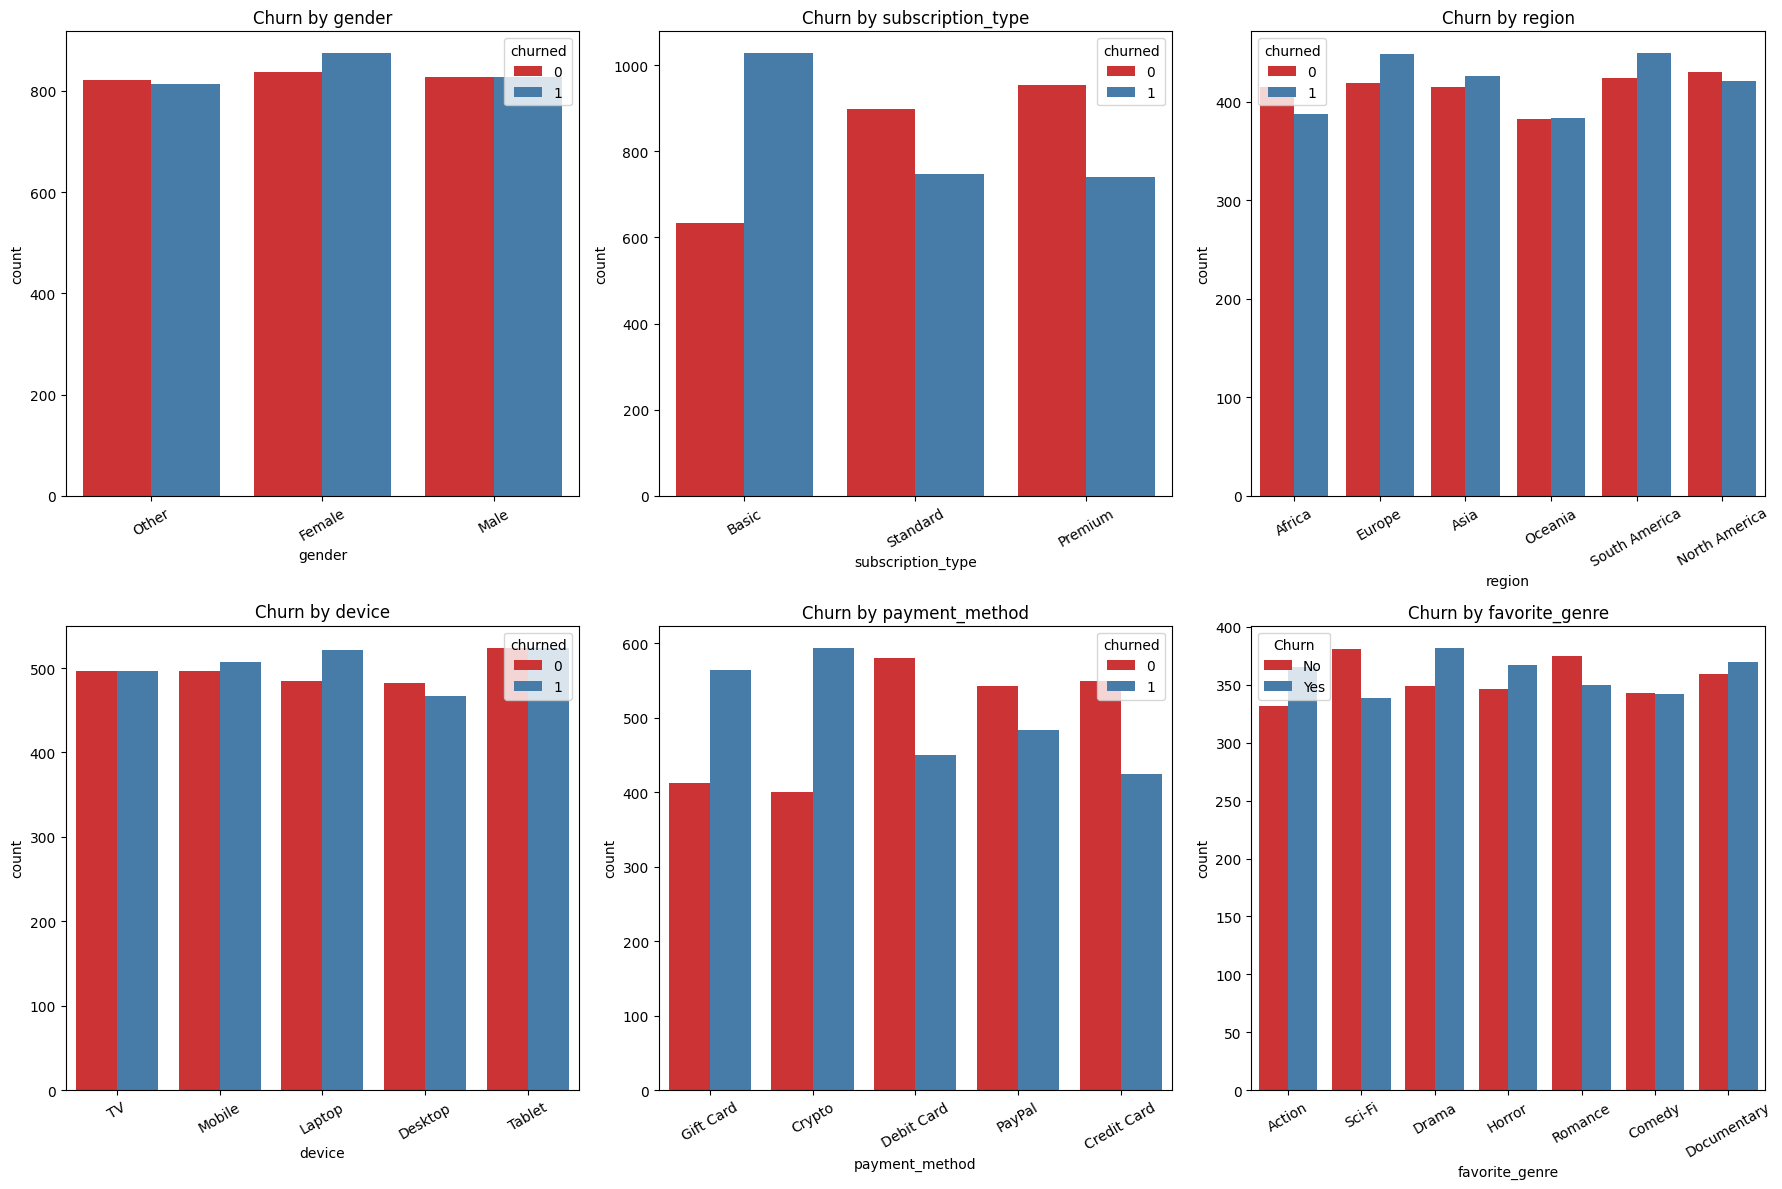

C:\Users\Tequila\AppData\Local\Temp\ipykernel_8756\4138538993.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='churned', y=col, palette='Set1')
C:\Users\Tequila\AppData\Local\Temp\ipykernel_8756\4138538993.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='churned', y=col, palette='Set1')
C:\Users\Tequila\AppData\Local\Temp\ipykernel_8756\4138538993.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='churned', y=col, palette='Set1')
C:\Users\Tequila\AppData\Local\Temp\ipykernel_8756\4138538993.py:16

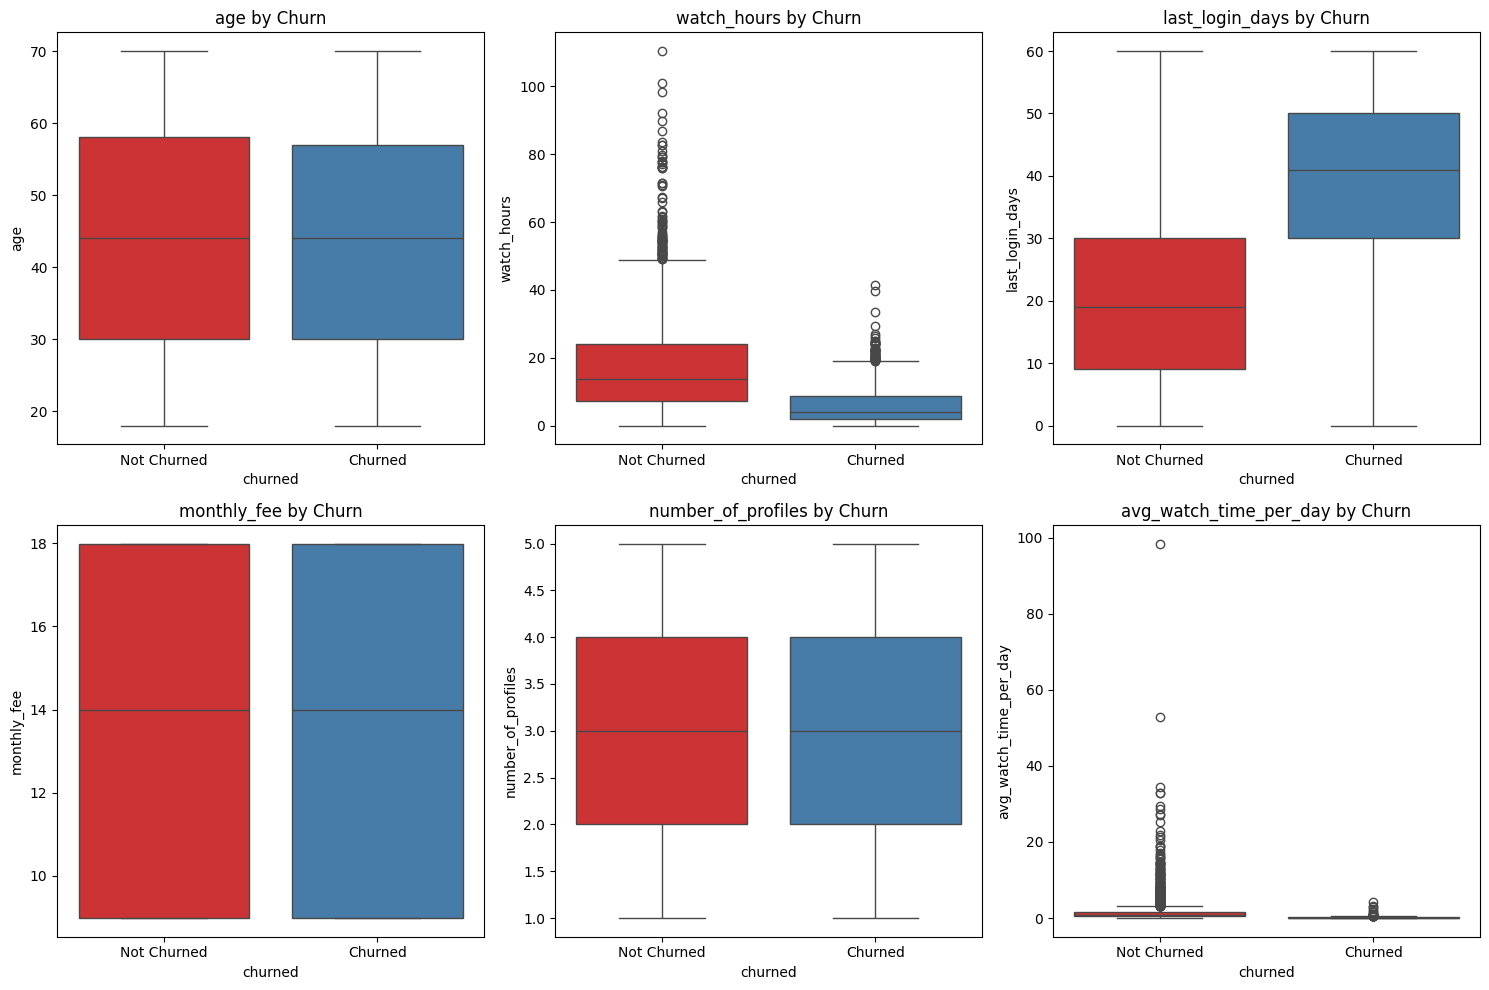

In [55]:
# 4. Relationship between churn and categorical features
plt.figure(figsize=(18, 12))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=col, hue='churned', palette='Set1')
    plt.title(f'Churn by {col}')
    plt.xticks(rotation=30)
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

# 5. Relationship between churn and numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x='churned', y=col, palette='Set1')
    plt.title(f'{col} by Churn')
    plt.xticks([0,1], ['Not Churned', 'Churned'])
plt.tight_layout()
plt.show()

##### - Theo giới tính thì số lượng nam giới rời bỏ sử dụng dịch vụ của Netflix khá cao.
##### - Hầu hết người dùng không thích sử dụng gói Basic cho lắm và ưu tiên sử dụng gói Premium hơn.
##### - Đa số người xem dùng thiết bị Laptop nhiều nhất
 

In [56]:
X = df.drop(columns=['churned'])
y = df['churned']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Accuracy Decision Tree: 0.971
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       498
           1       0.97      0.98      0.97       502

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000



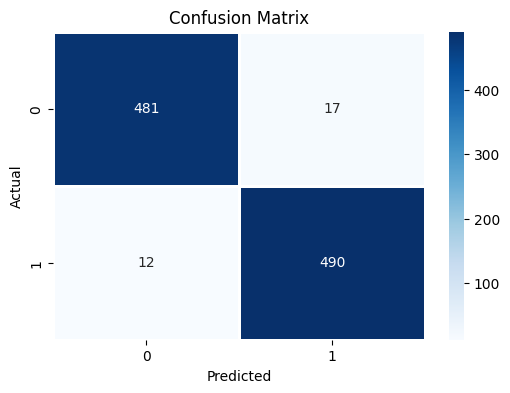

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Nếu X chứa biến dạng object (chuỗi), cần mã hóa chúng trước khi huấn luyện mô hình
from sklearn.preprocessing import LabelEncoder

X_encoded = X.copy()
for col in X_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])

# Tách lại tập train/test với dữ liệu đã mã hóa
X_train_enc = X_encoded.loc[X_train.index]
X_test_enc = X_encoded.loc[X_test.index]

# Khởi tạo và huấn luyện mô hình Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_enc, y_train)

# Dự đoán trên tập test
y_pred_dt = dt_model.predict(X_test_enc)

# Đánh giá mô hình
print("Accuracy Decision Tree:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
cm = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=2)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Feature Importances (Decision Tree):
                   Feature  Importance
10  avg_watch_time_per_day    0.592423
8           payment_method    0.089971
3              watch_hours    0.079716
9       number_of_profiles    0.077596
4          last_login_days    0.067355
2        subscription_type    0.036714
7              monthly_fee    0.035125
0                      age    0.005886
11          favorite_genre    0.005059
5                   region    0.004305
6                   device    0.003554
1                   gender    0.002297


C:\Users\Tequila\AppData\Local\Temp\ipykernel_8756\3785392967.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(20), palette='viridis')


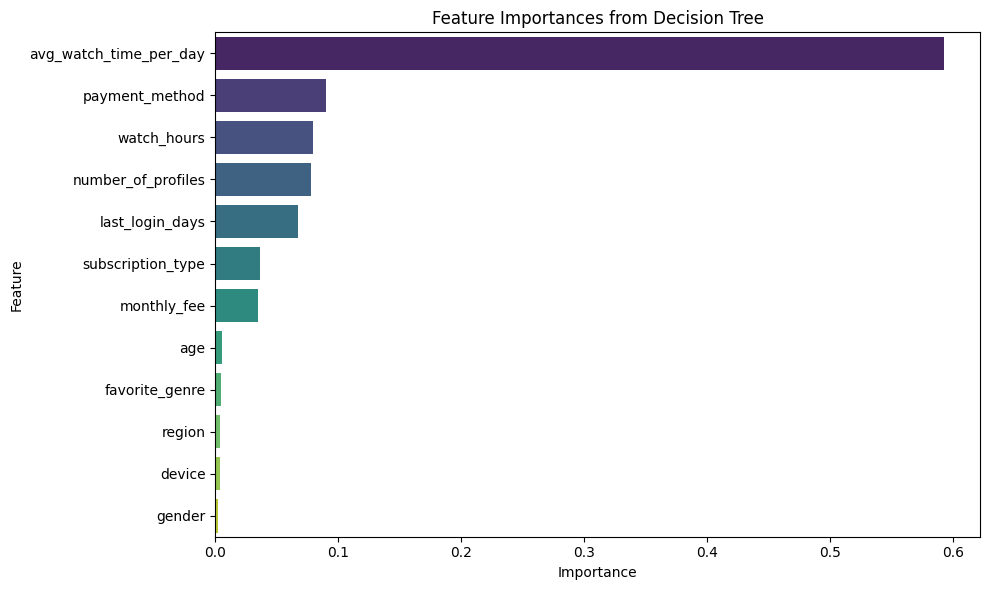

In [59]:
# Feature importance for Decision Tree
importances = dt_model.feature_importances_
feature_names = X_encoded.columns

# Create a DataFrame for better visualization
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances (Decision Tree):")
print(feat_imp_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(20), palette='viridis')
plt.title('Feature Importances from Decision Tree')
plt.tight_layout()
plt.show()


✅ Nhận xét tổng thể:
Feature avg_watch_time_per_day cực kỳ quan trọng:

Nó chiếm hơn 60% tổng mức độ quan trọng.

Điều này cho thấy: "thời gian xem trung bình mỗi ngày" là yếu tố then chốt trong việc mô hình quyết định phân loại.

Nhóm feature có mức ảnh hưởng vừa:

payment_method, watch_hours, number_of_profiles, last_login_days có importance khoảng 0.05 – 0.08.

Chúng là những yếu tố phụ trợ có đóng góp, nhưng không nổi bật bằng feature đầu tiên.

Nhóm feature ít ảnh hưởng hoặc không đáng kể:

age, favorite_genre, region, device, gender có giá trị gần 0.

Những feature này gần như không giúp ích nhiều cho việc phân tách dữ liệu theo tiêu chí của mô hình.

🎯 Giải thích tiềm năng:
Feature	Gợi ý giải thích
- avg_watch_time_per_day : Người dùng xem nhiều/ngày có thể là khách hàng trung thành → dễ dự đoán hành vi.
- ayment_method : Phương thức thanh toán có thể phản ánh mức độ cam kết (VD: credit card vs prepaid).
-number_of_profiles : Có thể liên quan đến quy mô gia đình, ảnh hưởng đến usage pattern.
- last_login_days : Tần suất đăng nhập gần đây → phản ánh mức độ gắn bó.
- age, gender, region : Dữ liệu nhân khẩu học có thể không liên quan trực tiếp đến hành vi xem.


✅ Kết luận:
Biểu đồ cho thấy mô hình đang rất phụ thuộc vào một feature chính (avg_watch_time_per_day), còn lại các feature khác đóng vai trò phụ. 


Accuracy Logistic Regression: 0.877
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88       498
           1       0.87      0.89      0.88       502

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.88      0.88      0.88      1000



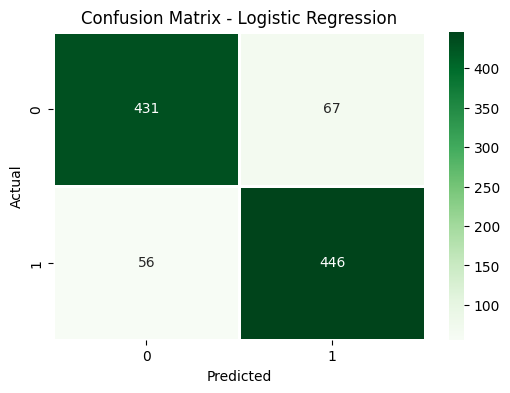

In [60]:
from sklearn.linear_model import LogisticRegression

# Khởi tạo và huấn luyện mô hình Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_enc, y_train)

# Dự đoán trên tập test
y_pred_lr = lr_model.predict(X_test_enc)

# Đánh giá mô hình
print("Accuracy Logistic Regression:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
cm_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens', linewidths=2)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


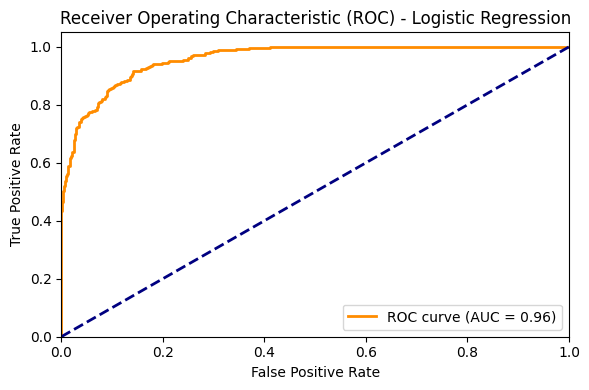

In [ ]:
# Predict probabilities for the positive class
y_proba_lr = lr_model.predict_proba(X_test_enc)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_proba_lr)
auc_score = roc_auc_score(y_test, y_proba_lr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Logistic Regression')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


✅ Phân tích biểu đồ ROC:
1. AUC = 0.96:
Đây là một kết quả rất tốt.

AUC (Area Under Curve) nằm trong khoảng [0.5, 1], với:

0.5 → mô hình đoán ngẫu nhiên.

1.0 → mô hình phân biệt hoàn hảo.

⇒ AUC = 0.96 có nghĩa là: Logistic Regression phân biệt cực kỳ tốt giữa 2 lớp (positive vs. negative).

2. Đường ROC cong sát góc trên trái:
Nghĩa là: mô hình có True Positive Rate (TPR) cao ngay cả khi False Positive Rate (FPR) thấp.

Điều này cho thấy mô hình hiệu quả trong việc phát hiện đúng mẫu dương (positive) mà không hy sinh quá nhiều sai nhầm.

✅ Kết luận:
Mô hình Logistic Regression hoạt động rất tốt, với AUC = 0.96, cho thấy khả năng phân loại gần như tối ưu.